# Plan out project

- In this project I will analyze the job applications to a specific job site
- The features included in this table is:
<br>
- __Uniqe id:__ Specific ID for job searcher
- __Crawl Timestamp:__ When the recruiter disclosed the salary
- __Job Title:__ The title of the job
- __Job Salary:__ The salary of the Job
- __Job Experience Required:__ How many years of experience needed
- __Key Skills:__ Which skille are most needed for the job
- __Role Catagory:__ In which category the job falls into
- __Location:__ The location of the job
- __Functional Area:__ In which area the job is in
- __Industry:__ In which kind of the Industry the job is in
- __Role:__ Which role the job is

### Import modules

- The modules that are needed for the project is imported below

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Import the csv-file and look at the dataset

In [2]:
df = pd.read_csv('job_sample.csv')
df.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


### Clean the dataset
- It is important to clean the dataset in the right way so it will be possible to draw any conclusions from it

In [ ]:
# Check null-values per column
df.shape
df.isnull().sum()

In [ ]:
df.dtypes

- There are in total 30 000 rows and 11 columns
- All columns have null-values in them besides the ID and the timestamp
- Most of the null-values are in the Role Category and Key Skills category
- All of the features are objects, some should be changed to numerical values

In [ ]:
# Change Crawl Timestamp to datetime
df['Crawl Timestamp'] = pd.to_datetime(df['Crawl Timestamp'])

# Check how job types look like
df['Job Salary'].value_counts()


1. It looks like the salarys are most often not disclused by recrutiter
- Should make a new columns/transform to have value which are disclosed by recruiter

2. Will remove the text in the beginning and end of string

3. Will make bins to put the salarys in as it is easier to graph and compare, by taking the average of the salarys

In [ ]:
def average_not_text(df, column):
    
    # Split into two columns
    df['A'], df['B'] = df[column].str.split('-', 1).str
    
    # Only keep numbers
    df['A'] = df['A'].str.extract('(\d+)', expand = False)
    df['B'] = df['B'].str.extract('(\d+)', expand = False)

    # Don't keep to big numbers
    df['A'] = df['A'].str[:9]
    df['B'] = df['B'].str[:9]
    
    # Drop na
    df.dropna(how = 'any', inplace = True)
    df['Average'] = (df['A'].astype(int) + df['B'].astype(int))/2
    
    df.drop(['A', 'B'], axis = 1, inplace = True)
    
    return df['Average']

In [ ]:
# Remove WhiteSpace and similar
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df['Job Salary'] = df['Job Salary'].apply(lambda x: str(x).replace(',', '')) # Remove commas


# Use function to create average salary and average experience
df['Average_Salary'] = average_(df, 'Job Salary')
df['Average_Experience'] = average_(df, 'Job Experience Required')

df.to_csv('First_Checkpoint.csv')

In [ ]:
# Drop original columns
df = pd.read_csv('First_Checkpoint.csv')
df.drop(df.columns[0], axis=1, inplace = True)
df.drop(['Job Salary'], axis = 1, inplace = True)
df.drop(['Job Experience Required'], axis = 1, inplace = True)
df.drop(['Average'], axis = 1, inplace = True)

df.head()

- Now we have the average job salary for each job seeker

In [ ]:
def expand_column(df, column, delimiter):
    df = df[column].str.split(delimiter, expand = True)
    return df

def add_columns(df, df2, length, name):
    for i in range(length):
        df[name + str(i)] = df2[i]
    return df

df_func = expand_column(df, 'Functional Area', ',')
df_skills = expand_column(df, 'Key Skills', '|')
df_role_categ = expand_column(df, 'Role Category', '/')
df_industry = expand_column(df, 'Industry', ',')
df_role = expand_column(df, 'Role', '/')
df_job = expand_column(df, 'Job Title', '/')
df_loc = expand_column(df, 'Location', ',')

df = add_columns(df, df_func, 6, 'fun_')
df = add_columns(df, df_skills, 10, 'skill_')
df = add_columns(df, df_role_categ, 3, 'role_cat_')
df = add_columns(df, df_industry, 4, 'ind_')
df = add_columns(df, df_role, 2, 'role_')
df = add_columns(df, df_job, 3, 'job_')
df = add_columns(df, df_loc, 4, 'loc_')


drop_columns = ['Functional Area', 'Key Skills', 'Role Category', 'Industry', 'Role', 'Job Title', 'Location']

df.drop(drop_columns, axis = 1, inplace = True)
df.head()

df.to_csv('Second_Checkpoint.csv')

In [3]:
df = pd.read_csv('Second_Checkpoint.csv')

df = df[df['Average_Salary'] < 3000000]

df['loc_1'].dropna(how = 'any', inplace = True)

def similar_values(df, string):
    df['loc_0'][df['loc_0'].str.contains(string, case = False)] = string
    return df

def similar_values2(df, string):
    df['loc_1'][df['loc_1'].str.contains(string, case = False)] = string
    return df

#df_group = df.groupby('loc_0').mean().sort_values(by = 'Average_Salary', ascending = False).reset_index()

list1 = ['Mumbai', 'Delhi', 'Bengaluru', 'Ahmedabad', 'Pune', 'Hyderabad', 
         'Gurgaon','Noida','Kolkata','Chennai','Ghaziabad','Surat','Faridabad']
    
for i in range(len(list1)):
    similar_values(df, list1[i])
    
for i in range(len(list1)):
    similar_values2(df, list1[i])
    
df['loc_0'].value_counts()

C:\Users\Elias\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Mumbai       1301
Delhi        1264
Bengaluru    1126
Pune          557
Gurgaon       505
             ... 
Bhavnagar       1
Hisar           1
Manesar         1
Bhiwani         1
Durgapur        1
Name: loc_0, Length: 72, dtype: int64

In [4]:
loc_larg = df['loc_0'].value_counts().nlargest(n = 10)
loc_larg2 = df['loc_1'].value_counts().nlargest(n = 10)

job_larg = df['job_0'].value_counts().nlargest(n = 10)
job_larg2 = df['job_1'].value_counts().nlargest(n = 10)

fun_larg = df['fun_0'].value_counts().nlargest(n = 10)
fun_larg2 = df['fun_1'].value_counts().nlargest(n = 10)

skills_larg = df['skill_0'].value_counts().nlargest(n = 10)
skills_larg2 = df['skill_1'].value_counts().nlargest(n = 10)

industry_larg = df['ind_0'].value_counts().nlargest(n = 10)
industry_larg2 = df['ind_1'].value_counts().nlargest(n = 10)

rol_larg = df['role_0'].value_counts().nlargest(n = 10)
rol_larg2 = df['role_1'].value_counts().nlargest(n = 10)

rol_cat_larg = df['role_cat_0'].value_counts().nlargest(n = 10)
rol_cat_larg2 = df['role_cat_1'].value_counts().nlargest(n = 10)


In [5]:
# Function to plot figures
def plot_figure(dataframe1, dataframe2, title1, title2):
    fig, ax = plt.subplots(1,2, figsize = (10,6))

    sns.set(style="whitegrid")
    ax1 = sns.barplot(x = dataframe1.index, y = dataframe1, ax = ax[0])
    ax1.set_title(title1, fontsize = 14)
    ax1.set_ylabel('Number of Occurances')
    graph = ax[0].set_xticklabels(ax1.get_xticklabels(), rotation=45, rotation_mode='anchor', ha = 'right')

    sns.set(style="whitegrid")
    ax2 = sns.barplot(x = dataframe2.index, y = dataframe2, ax = ax[1])
    ax2.set_title(title2, fontsize = 14)
    ax2.set_ylabel('Number of Occurances')
    graph = ax[1].set_xticklabels(ax2.get_xticklabels(), rotation=45, rotation_mode='anchor', ha = 'right')

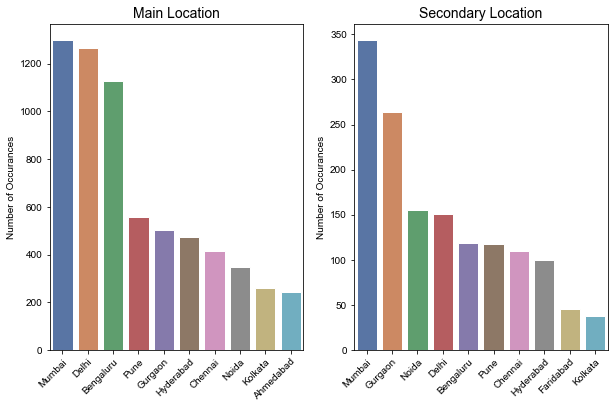

In [6]:
plot_figure(loc_larg, loc_larg2,'Main Location', 'Secondary Location')

In [ ]:
plot_figure(job_larg, job_larg2, 'Main Job Title', 'Secondary Job Title')

In [ ]:
plot_figure(fun_larg, fun_larg2, 'Main Function', 'Secondary Function')

In [ ]:
plot_figure(skills_larg, skills_larg2, 'Main Skills', 'Secondary Skills')

In [ ]:
plot_figure(industry_larg, industry_larg2, 'Main Industry', 'Secondary Industry')

In [ ]:
plot_figure(rol_larg, rol_larg2, 'Main Role', 'Secondary Role')

In [ ]:
plot_figure(rol_cat_larg, rol_cat_larg2, 'Main Role Category', 'Secondary Role Category')

### Evaluation vs Salary
- Now we have seen the most common for each, let us investigate comparing to salaries

In [ ]:
df = pd.read_csv('Second_Checkpoint.csv')

def group_function(df, column, treshold):
    counts = df[column].value_counts()
    df = df[~df[column].isin(counts[counts < treshold].index)]
    df[column].value_counts()
    df = df.groupby(column).mean().sort_values(by = 'Average_Salary', ascending = False)
    return df

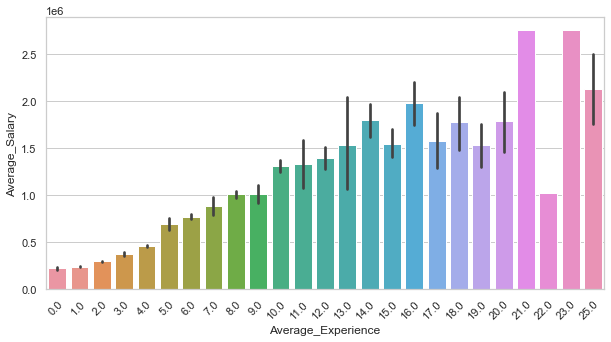

In [7]:
plt.figure(figsize = (10,5))
df['Average_Experience'] = round(df['Average_Experience'])
ax = sns.barplot(x = 'Average_Experience', y = 'Average_Salary', data = df)
graph = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha = 'right')

In [ ]:
df_loc = group_function(df, 'loc_0', 20).reset_index()

ax = sns.barplot(x = 'loc_0', y = 'Average_Salary', data = df_loc)
graph = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha = 'right')

In [ ]:
df_job = group_function(df, 'job_0', 10).reset_index()
ax = sns.barplot(x = 'job_0', y = 'Average_Salary', data = df_job)
graph = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha = 'right')

In [ ]:
df_skill = group_function(df, 'fun_0', 50).reset_index()
ax = sns.barplot(x = 'fun_0', y = 'Average_Salary', data = df_skill)
graph = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha = 'right')

In [ ]:
df_skill = group_function(df, 'skill_0', 30).reset_index()
ax = sns.barplot(x = 'skill_0', y = 'Average_Salary', data = df_skill)
graph = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha = 'right')

In [ ]:
df_ind = group_function(df, 'ind_0', 80).reset_index()
ax = sns.barplot(x = 'ind_0', y = 'Average_Salary', data = df_ind)
graph = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha = 'right')

In [ ]:
df_role = group_function(df, 'role_0', 50).reset_index()
ax = sns.barplot(x = 'role_0', y = 'Average_Salary', data = df_role)
graph = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha = 'right')

In [ ]:
df_role_cat = group_function(df, 'role_cat_0', 60).reset_index()
ax = sns.barplot(x = 'role_cat_0', y = 'Average_Salary', data = df_role_cat)
graph = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha = 'right')

### Summary of jobs that disclose Salaries

Most Common Location of Job seekers
- Mumbai
- Delhi
- Bengaluru
- Pune
- Gurgaun

Most common Job titles
- Business Developement Executive
- Sales Executive
- Java Developer
- Business Developement Manager
- PHP Developer

Most common Functions
- Sales
- IT Software
- ITES
- HR
- Accounts

Most common Skills
- bpo
- Sales
- Java
- Communication Skills
- C#

Most common Industries
- IT-Software
- BPO
- Banking
- Education
- Medical

Most common Roles
- Software Developer
- Associate
- Sales
- Sales Executive
- Fresher

Most common Role Category
- Programming & Design
- Voice
- Retail Sales
- HR
- Other

## Features vs Salary

Experience vs Salary
- Strong relationship, highest Salaries between 15-25 years of experience

Highest Salary per Job location
1. Bengaluru
2. Mumbai
3. Gurgaon
4. Huderabad
5. Pune

Highest Salary per Job title
1. Manager
2. Developement Manager
3. Full Stack Developer
4. Business Analyst
5. Area Sales Manager

Highest Salary per Function
1. Analytics & Business Intelligence
2. IT SoftWare - eCommerce
3. IT Software - OTher
4. IT SoftWare - Application Programming
5. ITES

Highest Salary Per Skill
1. Java
2. C#
3. business developement
4. Sales
5. Digital Marketing

Highest Salary Per Industry
1. Medical
2. IT-Software
3. Automobile
4. Retail
5. FMCG

Highest Salary Per Role
1. Fresher
2. Head
3. Team Lead
4. Software Developer
5. Testing Engineer

Highest Salary per Role Catagory
1. Management
2. Other
3. System Design
4. Programming & Design
5. Finance